In [14]:
import pandas as pd
import numpy as np

In [15]:
iris_df = pd.read_csv('iris_data.csv', sep=';')
iris_labels_df = pd.read_csv('iris_labels-1.csv', sep=';')
#print(iris_labels_df.sample(5))
df = iris_df.merge(iris_labels_df, on='id', how='inner')
print(df.sample(3))

       pl   pw   sl   sw    id examiner          species
6493  5.0  1.9  3.5  1.1  9961   Sobhan  Iris-versicolor
1225  5.0  3.8  1.6  0.2  1847    Ahmad      Iris-setosa
2298  5.3  3.4  1.4  0.2  3479   Sobhan      Iris-setosa


In [16]:
df = df.drop(['examiner'], axis=1)
print(df.sample(10))

       pl   pw   sl   sw    id         species
3387  4.4  3.1  1.4  0.2  5148     Iris-setosa
2855  5.1  3.3  1.4  0.3  4351     Iris-setosa
1391  4.4  2.9  1.0  0.2  2114     Iris-setosa
4057  5.5  4.3  1.4  0.2  6184     Iris-setosa
319   5.1  3.5  1.6  0.4   478     Iris-setosa
4780  6.5  2.8  5.5  2.2  7333  Iris-virginica
5168  7.4  2.8  6.1  2.0  7931  Iris-virginica
4474  5.6  2.4  5.0  2.1  6864  Iris-virginica
2115  5.2  3.7  1.5  0.2  3197     Iris-setosa
3655  5.0  3.8  1.6  0.5  5570     Iris-setosa


In [17]:
df = df.sort_values(by='species')
print(df)

       pl   pw   sl   sw    id         species
0     5.0  3.5  1.3  0.3     1     Iris-setosa
3542  4.8  2.9  1.3  0.2  5402     Iris-setosa
3543  4.8  3.1  1.1  0.3  5403     Iris-setosa
3544  5.0  3.6  1.3  0.2  5405     Iris-setosa
3545  5.5  3.7  1.7  0.5  5406     Iris-setosa
...   ...  ...  ...  ...   ...             ...
3817  7.3  2.7  6.2  1.9  5831  Iris-virginica
3818  8.0  3.8  6.4  2.1  5832  Iris-virginica
3819  6.4  2.7  5.6  2.3  5833  Iris-virginica
3891  7.1  3.4  6.0  2.4  5960  Iris-virginica
4279  6.4  2.7  5.3  1.9  6562  Iris-virginica

[6500 rows x 6 columns]


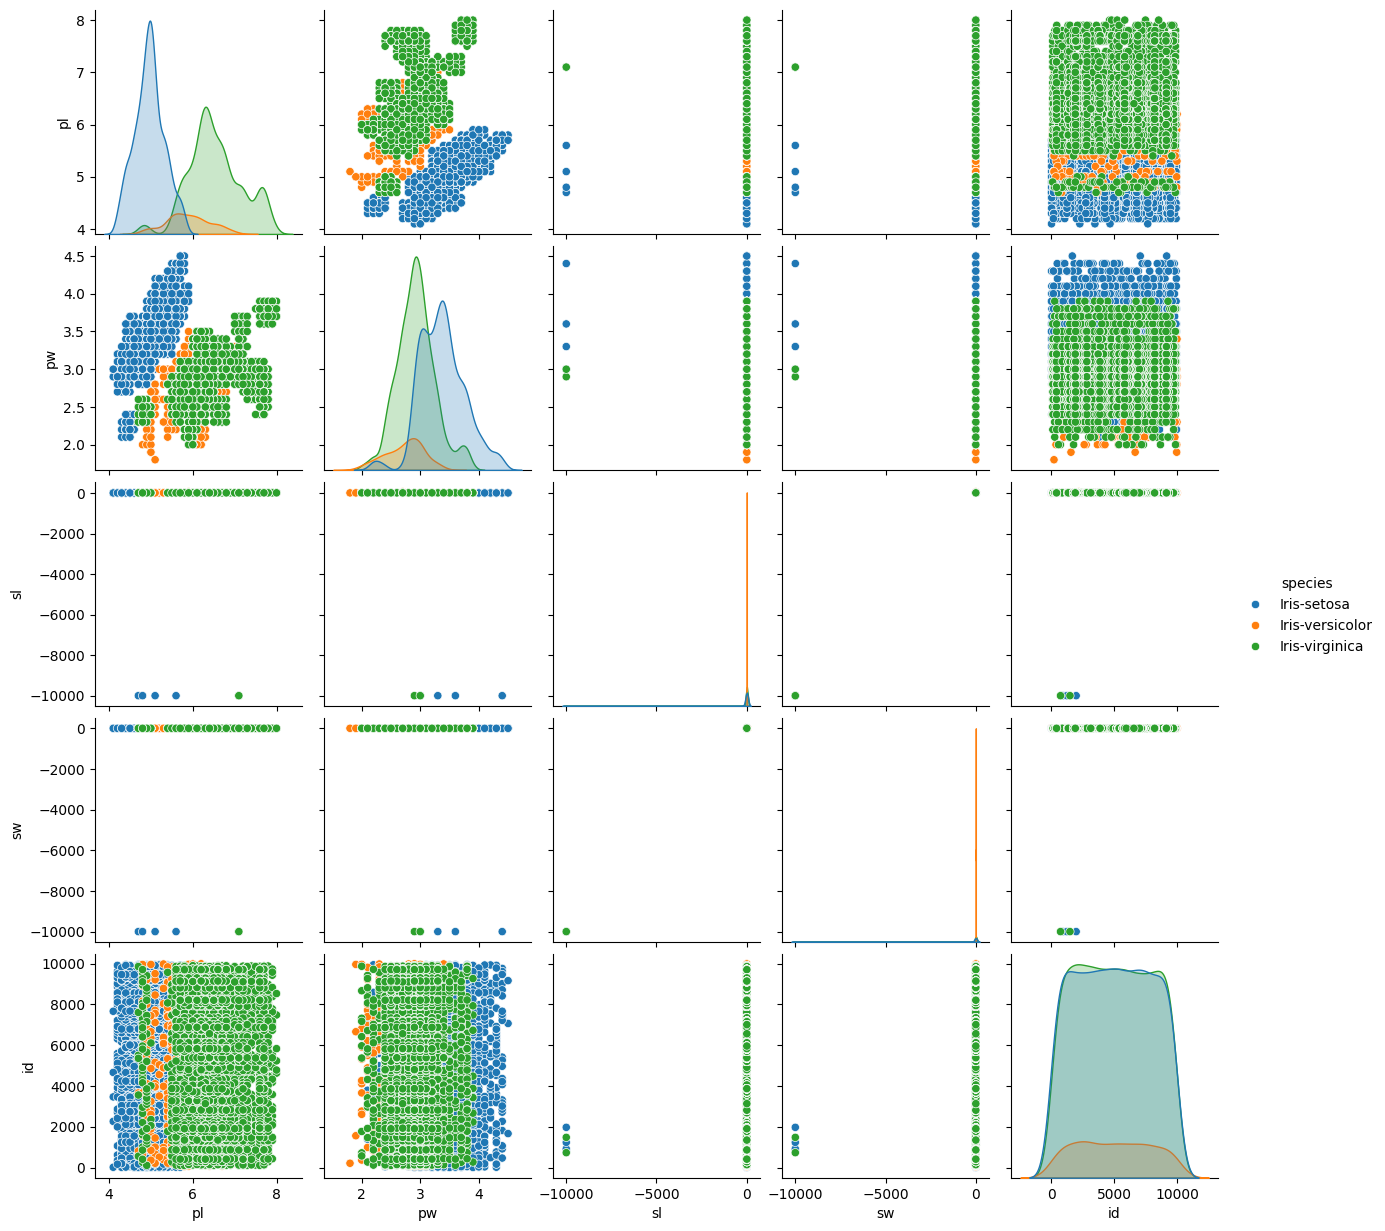

In [18]:
import seaborn
seaborn.pairplot(df, hue='species')

In [19]:
df = df[~(df.isin([-9999]).any(axis=1))]

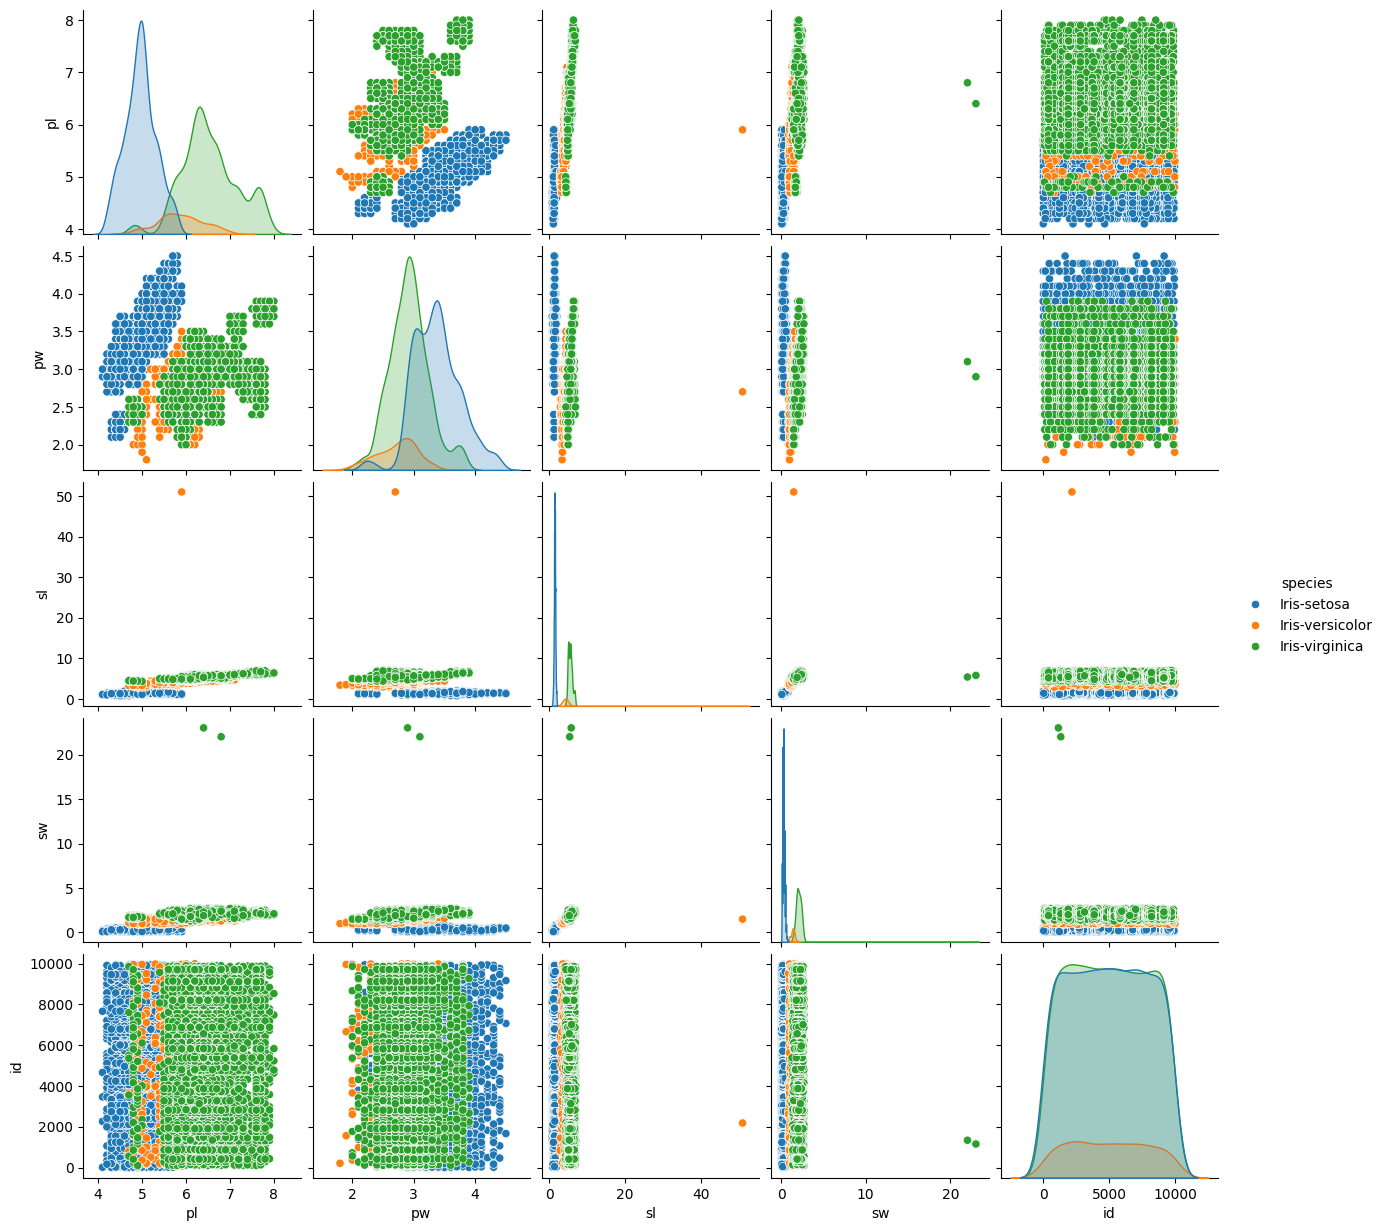

In [20]:
seaborn.pairplot(df, hue='species')

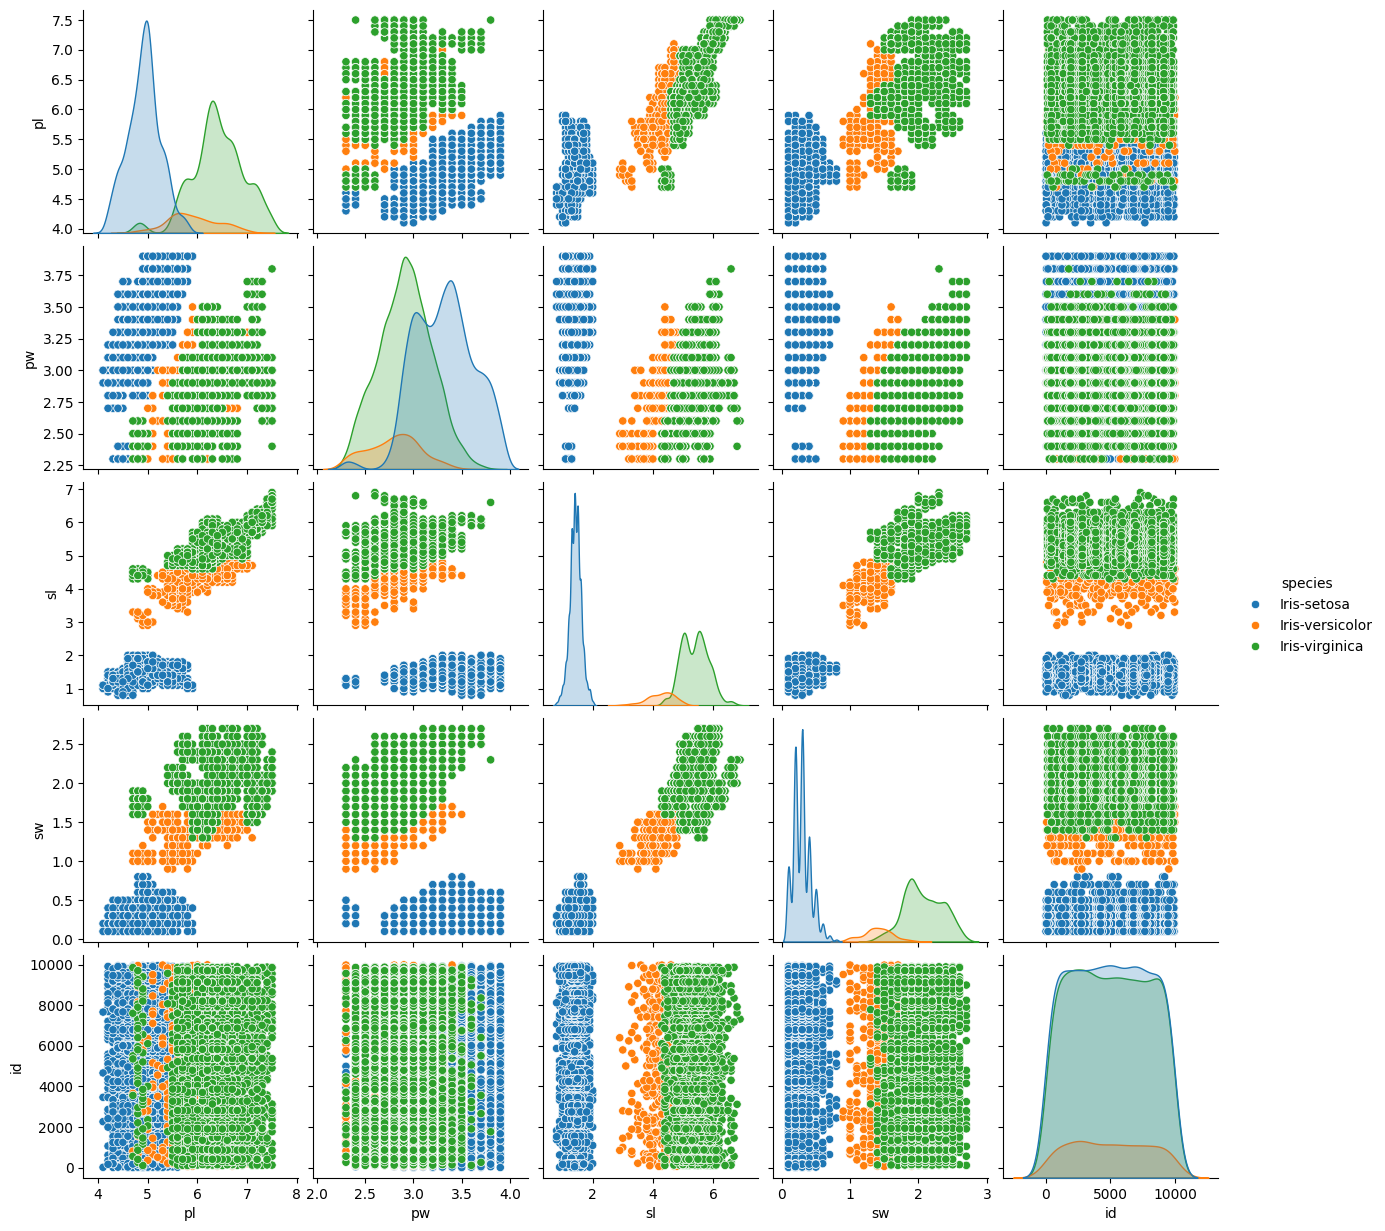

In [21]:
from scipy import stats
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric = df_numeric.drop(['id'], axis=1)
threshold = 2
z_score = np.abs(stats.zscore(df_numeric))
outliers = (z_score > threshold).any(axis=1)
df = df[~outliers]
seaborn.pairplot(df, hue='species')

In [22]:
from sklearn.preprocessing import MinMaxScaler
species = df['species']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_numeric)
scaled_df = pd.DataFrame(scaled_data, columns=df_numeric.columns)
print(scaled_df)

            pl        pw        sl        sw
0     0.230769  0.629630  0.009960  0.008734
1     0.179487  0.407407  0.009960  0.004367
2     0.179487  0.481481  0.005976  0.008734
3     0.230769  0.666667  0.009960  0.004367
4     0.358974  0.703704  0.017928  0.017467
...        ...       ...       ...       ...
6489  0.820513  0.333333  0.107570  0.078603
6490  1.000000  0.740741  0.111554  0.087336
6491  0.589744  0.333333  0.095618  0.096070
6492  0.769231  0.592593  0.103586  0.100437
6493  0.589744  0.333333  0.089641  0.078603

[6494 rows x 4 columns]


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)
scaled_df = pd.DataFrame(scaled_data, columns=df_numeric.columns)
print(scaled_df)

            pl        pw        sl        sw
0    -0.827190  0.893973 -1.059584 -0.943354
1    -1.045214 -0.500063 -1.059584 -1.047510
2    -1.045214 -0.035384 -1.154716 -0.943354
3    -0.827190  1.126312 -1.059584 -1.047510
4    -0.282131  1.358652 -0.869319 -0.735042
...        ...       ...       ...       ...
6489  1.680080 -0.964741  1.271163  0.723141
6490  2.443163  1.590991  1.366296  0.931453
6491  0.698975 -0.964741  0.985766  1.139765
6492  1.462057  0.661634  1.176031  1.243921
6493  0.698975 -0.964741  0.843067  0.723141

[6494 rows x 4 columns]


In [26]:
from sklearn.decomposition import PCA
pca = PCA()
pc = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pc, columns=[f'PC{i+1}' for i in range(pc.shape[1])])
pca_df = pd.concat([pca_df, species.reset_index(drop=True)], axis=1)
print(pca_df)

           PC1       PC2       PC3       PC4      species
0    -1.833088  0.365883  0.031669 -0.031308  Iris-setosa
1    -1.580460 -1.007447 -0.157991 -0.157373  Iris-setosa
2    -1.719147 -0.576225  0.016516 -0.170989  Iris-setosa
3    -1.961179  0.570113 -0.012928  0.037424  Iris-setosa
4    -1.464316  1.028986 -0.062851 -0.120621  Iris-setosa
...        ...       ...       ...       ...          ...
6489  2.303358 -0.114920 -0.731141 -0.197368          NaN
6490  2.095411  2.547671 -0.588895 -0.080584          NaN
6491  1.853009 -0.466113  0.196677 -0.022441          NaN
6492  1.925305  1.338208  0.088002  0.020330          NaN
6493  1.542093 -0.510969 -0.111606 -0.037267          NaN

[6494 rows x 5 columns]


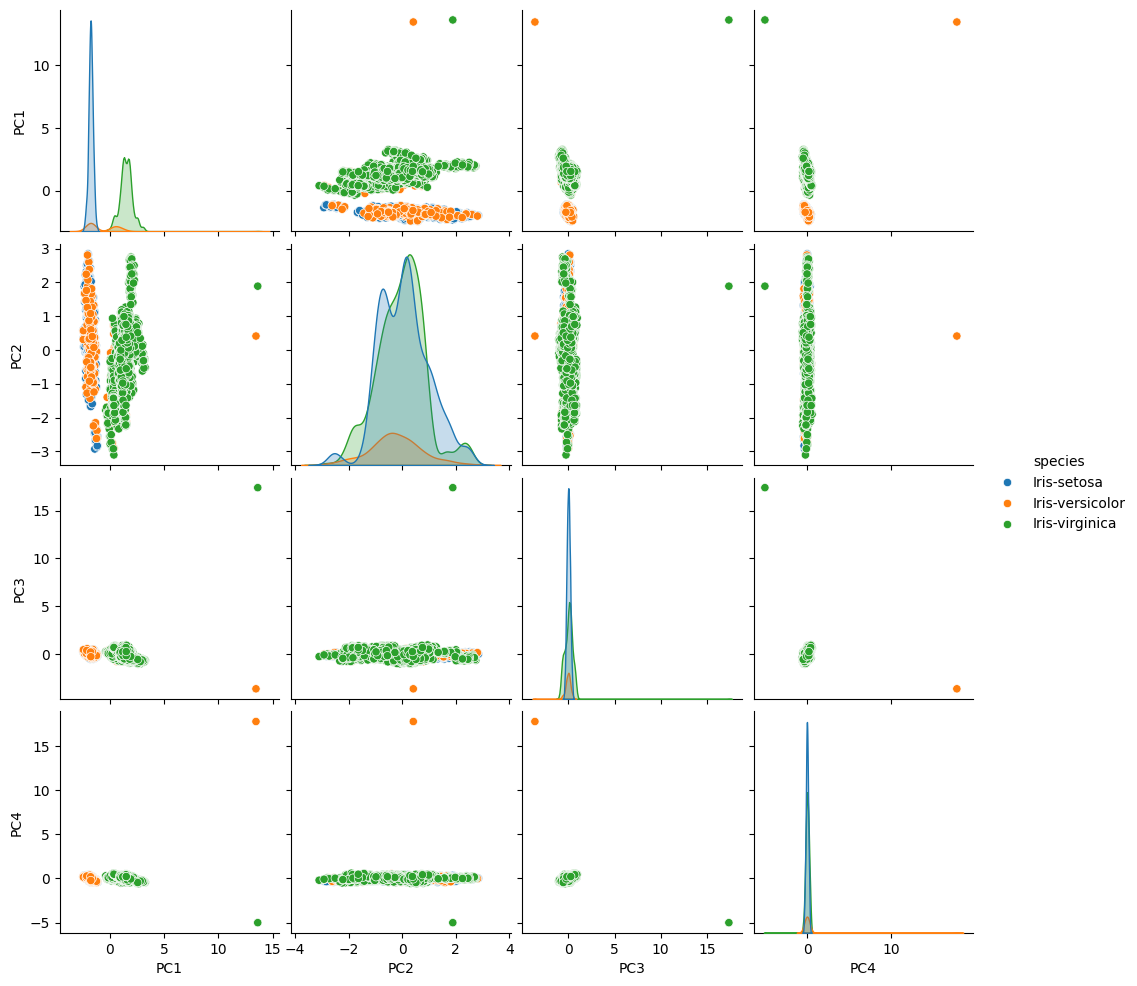

In [27]:
seaborn.pairplot(pca_df, hue='species')

In [31]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.95) + 1
print(n_components)

3


In [32]:
pd.DataFrame(pca.components_, columns=["Sepal L", "Sepal W", "Petal L", "Petal W"], index=['PC 1', 'PC 2', 'PC 3', 'PC 4']).abs().mean(axis=0)

Sepal L    0.495255
Sepal W    0.394169
Petal L    0.397293
Petal W    0.418429
dtype: float64